<a href="https://colab.research.google.com/github/abhigyan2003/keystroke/blob/main/sequencedata_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Load the dataset
file_path = r"/content/User1.csv"

df = pd.read_csv(file_path, encoding='latin1')  # Use 'latin1' to avoid encoding issues


df.head()


,Timestamp,EventType,Key,Username
0,"2017-03-20 01:24:55,555",RESTART,NaN,NaN
1,"2017-03-20 01:25:20,894",release,Key.alt_l,User1
2,"2017-03-20 01:25:20,910",release,Key.ctrl_l,User1
3,"2017-03-20 01:25:20,910",release,Key.shift,User1
4,"2017-03-20 01:25:20,910",release,Key.cmd,User1


In [3]:
# Check shape and columns
print(f"Shape: {df.shape}")
print("Columns:", df.columns.tolist())

# Rename if needed (depends on dataset)
# df = df.rename(columns={'v1': 'label', 'v2': 'text'})




Shape: (195036, 4)
Columns: ['Timestamp', 'EventType', 'Key', 'Username']


In [4]:
print("Columns in the dataset:")
print(df.columns.tolist())


df.head()


Columns in the dataset:
['Timestamp', 'EventType', 'Key', 'Username']


,Timestamp,EventType,Key,Username
0,"2017-03-20 01:24:55,555",RESTART,NaN,NaN
1,"2017-03-20 01:25:20,894",release,Key.alt_l,User1
2,"2017-03-20 01:25:20,910",release,Key.ctrl_l,User1
3,"2017-03-20 01:25:20,910",release,Key.shift,User1
4,"2017-03-20 01:25:20,910",release,Key.cmd,User1


In [5]:

print(df.info())

# Check unique event types (e.g., press, release, REFRESH)
print("\nUnique Event Types:")
print(df['EventType'].unique())

# Unique keys
print("\nUnique Keys:")
print(df['Key'].unique())

# Unique usernames
print("\nUnique Users:")
print(df['Username'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195036 entries, 0 to 195035
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  195036 non-null  object
 1   EventType  195036 non-null  object
 2   Key        194326 non-null  object
 3   Username   194326 non-null  object
dtypes: object(4)
memory usage: 6.0+ MB
None

Unique Event Types:
['RESTART' 'release' 'press' 'REFRESH']

Unique Keys:
[nan 'Key.alt_l' 'Key.ctrl_l' 'Key.shift' 'Key.cmd' 'Key.alt_r'
 'Key.ctrl_r' 'Key.shift_r' 'Key.cmd_r' "u'LEFT'" "u'RIGHT'" "u'CENTER'"
 "u'None'" 'Key.backspace' 'Key.space' 'Key.enter' "u'DIGIT'" 'Key.tab'
 'Key.up' 'Key.down' 'Key.delete' 'Key.caps_lock' 'Key.right'
 'Key.num_lock' '<175>' '<174>' '<135>' 'Key.esc' '<47>' 'Key.f11'
 'Key.f12' 'Key.left' '<241>' '<234>' 'Key.f7']

Unique Users:
[nan 'User1']


In [6]:

if 'Key' in df.columns:
    unique_keys = df['Key'].dropna().unique()  # Drop NaNs (for rows like REFRESH)
    print(f"Total Unique Keys: {len(unique_keys)}")
    print("Unique Key Values:")
    for key in unique_keys:
        print(key)
else:
    print("'Key' column not found in the DataFrame.")


Total Unique Keys: 34
Unique Key Values:
Key.alt_l
Key.ctrl_l
Key.shift
Key.cmd
Key.alt_r
Key.ctrl_r
Key.shift_r
Key.cmd_r
u'LEFT'
u'RIGHT'
u'CENTER'
u'None'
Key.backspace
Key.space
Key.enter
u'DIGIT'
Key.tab
Key.up
Key.down
Key.delete
Key.caps_lock
Key.right
Key.num_lock
<175>
<174>
<135>
Key.esc
<47>
Key.f11
Key.f12
Key.left
<241>
<234>
Key.f7


<ipython-input-7-3336381617>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keys.values, y=top_keys.index, palette='magma')


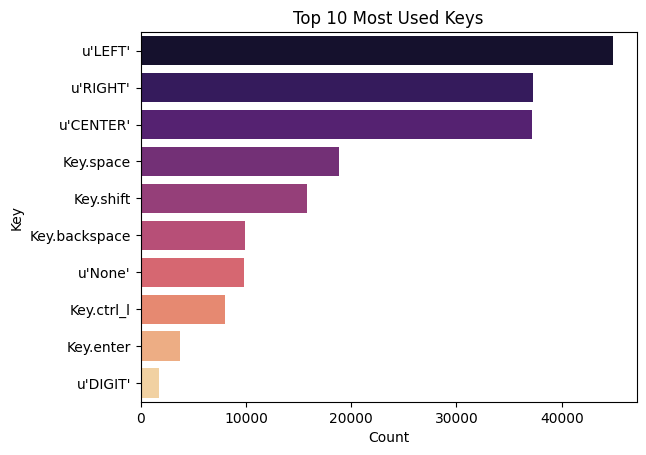

In [7]:
top_keys = df['Key'].value_counts().head(10)
sns.barplot(x=top_keys.values, y=top_keys.index, palette='magma')
plt.title("Top 10 Most Used Keys")
plt.xlabel("Count")
plt.ylabel("Key")
plt.show()


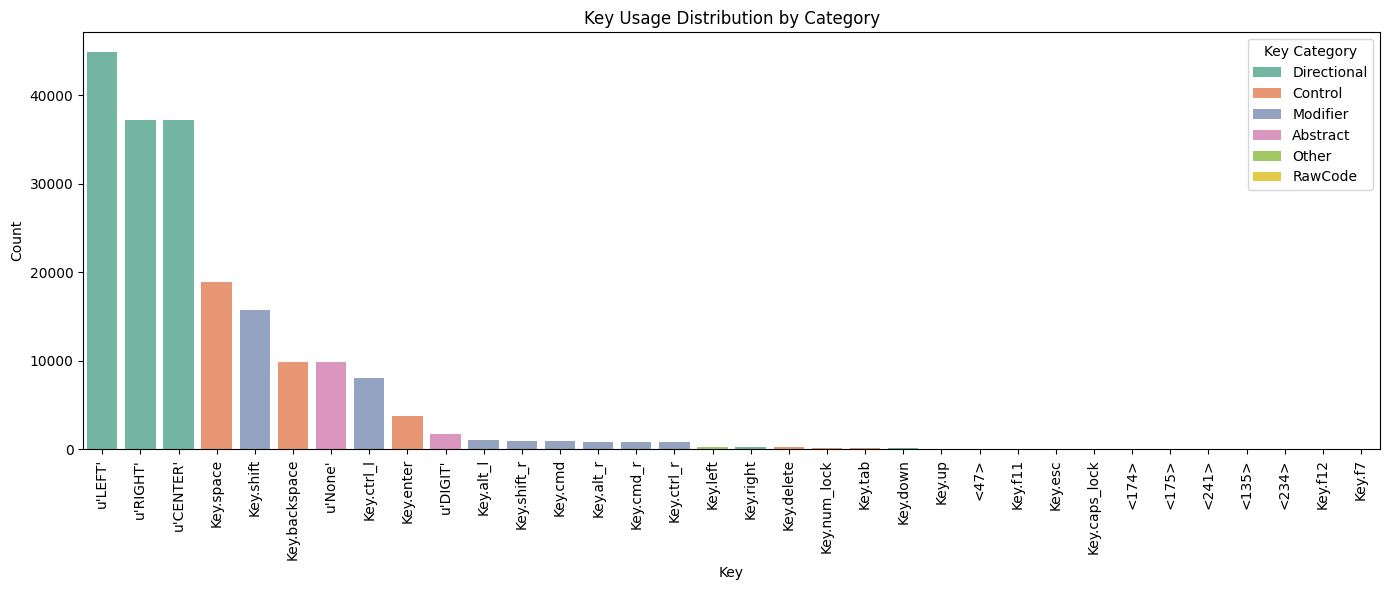

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorization map for all unique keys
key_categories = {
    # Modifier keys
    'Key.alt_l': 'Modifier', 'Key.ctrl_l': 'Modifier', 'Key.shift': 'Modifier',
    'Key.cmd': 'Modifier', 'Key.alt_r': 'Modifier', 'Key.ctrl_r': 'Modifier',
    'Key.shift_r': 'Modifier', 'Key.cmd_r': 'Modifier',

    # Directional / positional keys
    "u'LEFT'": 'Directional', "u'RIGHT'": 'Directional', "u'CENTER'": 'Directional',
    'Key.up': 'Directional', 'Key.down': 'Directional', 'Key.right': 'Directional',

    # Control / action keys
    'Key.backspace': 'Control', 'Key.space': 'Control', 'Key.enter': 'Control',
    'Key.tab': 'Control', 'Key.delete': 'Control', 'Key.esc': 'Control',
    'Key.caps_lock': 'Control', 'Key.num_lock': 'Control', 'Key.f11': 'Control',

    # Abstract / placeholder
    "u'DIGIT'": 'Abstract', "u'None'": 'Abstract',

    # Raw key codes
    '<175>': 'RawCode', '<174>': 'RawCode', '<135>': 'RawCode', '<47>': 'RawCode'
}

# Count key frequencies
key_counts = df['Key'].value_counts().dropna()

# Assign categories to each key based on mapping
category_data = []
for key, count in key_counts.items():
    category = key_categories.get(key, 'Other')
    category_data.append({'Key': key, 'Count': count, 'Category': category})

# Create DataFrame from categorized keys
key_df = pd.DataFrame(category_data)

# Plot using seaborn
plt.figure(figsize=(14, 6))
sns.barplot(data=key_df, x='Key', y='Count', hue='Category', dodge=False, palette='Set2')
plt.title("Key Usage Distribution by Category")
plt.xlabel("Key")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Key Category")
plt.tight_layout()
plt.show()


In [9]:
!pip install torch numpy pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt
import math


In [11]:
import pandas as pd

# Load your file (only 1 user)
df = pd.read_csv( r"/content/User1.csv")

# Drop unwanted rows
df = df[df['EventType'].isin(['press', 'release'])]
df = df.dropna(subset=['Key'])

# Encode key values
from sklearn.preprocessing import LabelEncoder
key_encoder = LabelEncoder()
df['KeyEncoded'] = key_encoder.fit_transform(df['Key'])

# Parameters
SEQ_LEN = 10

# Create sequences: X = first 10 keys, y = next key
X, y = [], []
for i in range(len(df) - SEQ_LEN):
    seq = df['KeyEncoded'].iloc[i:i+SEQ_LEN].tolist()
    target = df['KeyEncoded'].iloc[i+SEQ_LEN]
    X.append(seq)
    y.append(target)



In [12]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_tensor = torch.tensor(X, dtype=torch.long)
y_tensor = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

vocab_size = len(key_encoder.classes_)



In [13]:
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len).unsqueeze(1)
        div = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(pos * div)
        pe[:, 1::2] = torch.cos(pos * div)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]



In [14]:
class KeyPredictor(nn.Module):
    def __init__(self, vocab_size, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, vocab_size)

    def forward(self, x):
        x = self.embedding(x)           # (B, T, d_model)
        x = self.pos_encoder(x)
        x = self.encoder(x)             # (B, T, d_model)
        x = x[:, -1, :]                 # Take output of last token only
        return self.fc(x)               # Predict next key (vocab size)


In [15]:
model = KeyPredictor(vocab_size=vocab_size)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()


In [16]:
for epoch in range(5):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        preds = model(xb)
        loss = loss_fn(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 6315.1551
Epoch 2, Loss: 5429.3054
Epoch 3, Loss: 5195.4257
Epoch 4, Loss: 5064.6482
Epoch 5, Loss: 4964.9422


In [17]:
def predict_next(input_seq):
    model.eval()
    input_seq = torch.tensor([input_seq], dtype=torch.long)
    with torch.no_grad():
        logits = model(input_seq)
        probs = torch.softmax(logits, dim=1)
        top_idx = torch.argmax(probs, dim=1).item()
    return key_encoder.inverse_transform([top_idx])[0]

# Try on the last sequence from your data
test_seq = X[-1]
print("Last 10 keys:", key_encoder.inverse_transform(test_seq))
print("Predicted next key:", predict_next(test_seq))


Last 10 keys: ['Key.alt_l' 'Key.ctrl_l' 'Key.shift' 'Key.cmd' 'Key.alt_r' 'Key.ctrl_r'
 'Key.shift_r' 'Key.cmd_r' 'Key.ctrl_l' 'Key.ctrl_l']
Predicted next key: Key.shift
